In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("wrangled_auto.csv")
#df.columns

In [3]:
Y=df['price']
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [4]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]

In [5]:
pipe=Pipeline(Input)

In [6]:
pipe.fit(Z, Y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [8]:
yhat=pipe.predict(Z)
yhat[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

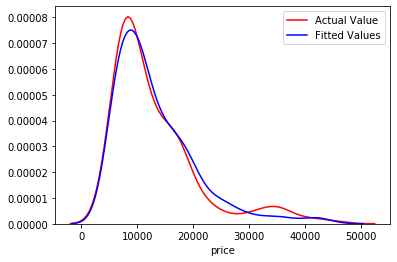

In [9]:
#Distribution Plot
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax = ax1)
plt.show()